In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
array = []
for path in sorted(glob.glob("results/expression/stringtie/fpkm/*/gene_abund.tab")):
    sample = path.split("/")[-2]
    d = pd.read_csv(path, sep="\t", header=0, index_col=0)
    d = d[~d.index.duplicated()]
    s = d["FPKM"]
    s.name = sample
    array.append(s)

In [4]:
mtx = pd.concat(array, axis=1)
mtx.index.name = "Gene"
mtx.head()

,Ad_Br_Fe_1,Ad_Br_Fe_2,Ad_Br_Fe_3,Ad_Br_Fe_4,Ad_Br_Ma_1,Ad_Br_Ma_2,Ad_Br_Ma_3,Ad_Br_Ma_4,Ad_Ey_Fe_1,Ad_Ey_Fe_2,...,Ju_He_Mi_1,Ju_He_Mi_2,Ju_In_Mi_1,Ju_In_Mi_2,Ju_Ki_Mi_1,Ju_Ki_Mi_2,Ju_Li_Mi_1,Ju_Li_Mi_2,Ju_Mu_Mi_1,Ju_Mu_Mi_2
Gene,,,,,,,,,,,,,,,,,,,,,
dnttip2,3.085598,3.926429,7.268777,7.052400,4.755616,4.710651,3.383726,6.833172,2.899503,3.812892,...,4.725527,5.412279,2.571882,3.214571,15.210531,8.329556,12.905633,8.677989,6.405857,4.715194
spata6,2.101144,4.044379,3.000731,5.403895,2.569249,3.039683,2.719113,2.962077,4.569369,0.174698,...,0.593174,0.596989,0.554587,0.356537,1.733724,2.478904,0.062211,0.752547,0.271551,0.117984
agbl4,8.152759,12.011903,7.123012,6.610610,9.681334,8.549488,11.676530,8.549114,5.838369,0.113447,...,0.021694,0.000000,0.297763,0.243007,0.798633,1.560844,0.277504,3.265905,0.000000,0.000000
bend5,0.160557,0.977273,0.797821,1.312983,1.255792,0.919394,1.031262,0.832688,2.140538,0.515510,...,0.508204,0.526281,0.184631,0.760936,0.544800,0.537391,0.204166,0.292474,0.159871,0.515637
LOC111227272,0.264438,0.474432,0.972505,2.213263,0.522416,1.243675,1.932799,2.578136,2.109635,1.753448,...,2.099677,1.752505,0.809778,0.152224,29.325710,12.395607,0.532124,0.726260,0.071470,0.036358


In [5]:
mtx.to_csv("results/fpkm_known_genes.tsv", sep="\t")

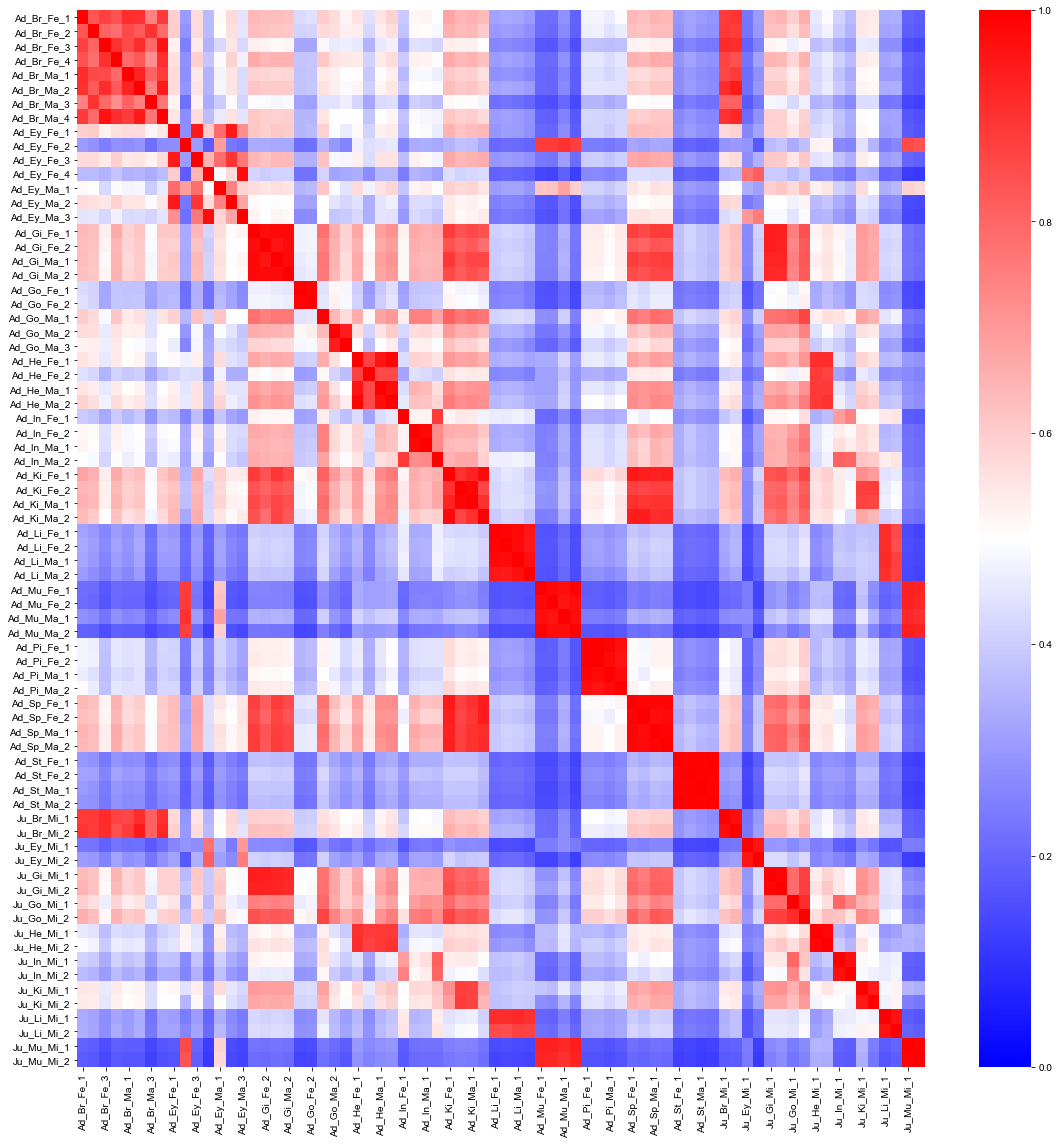

In [36]:
corr = mtx.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, cmap="bwr", vmin=0, vmax=1)
plt.tight_layout()
plt.savefig("figures/expression_correlation.heatmap.pdf", dpi=300)

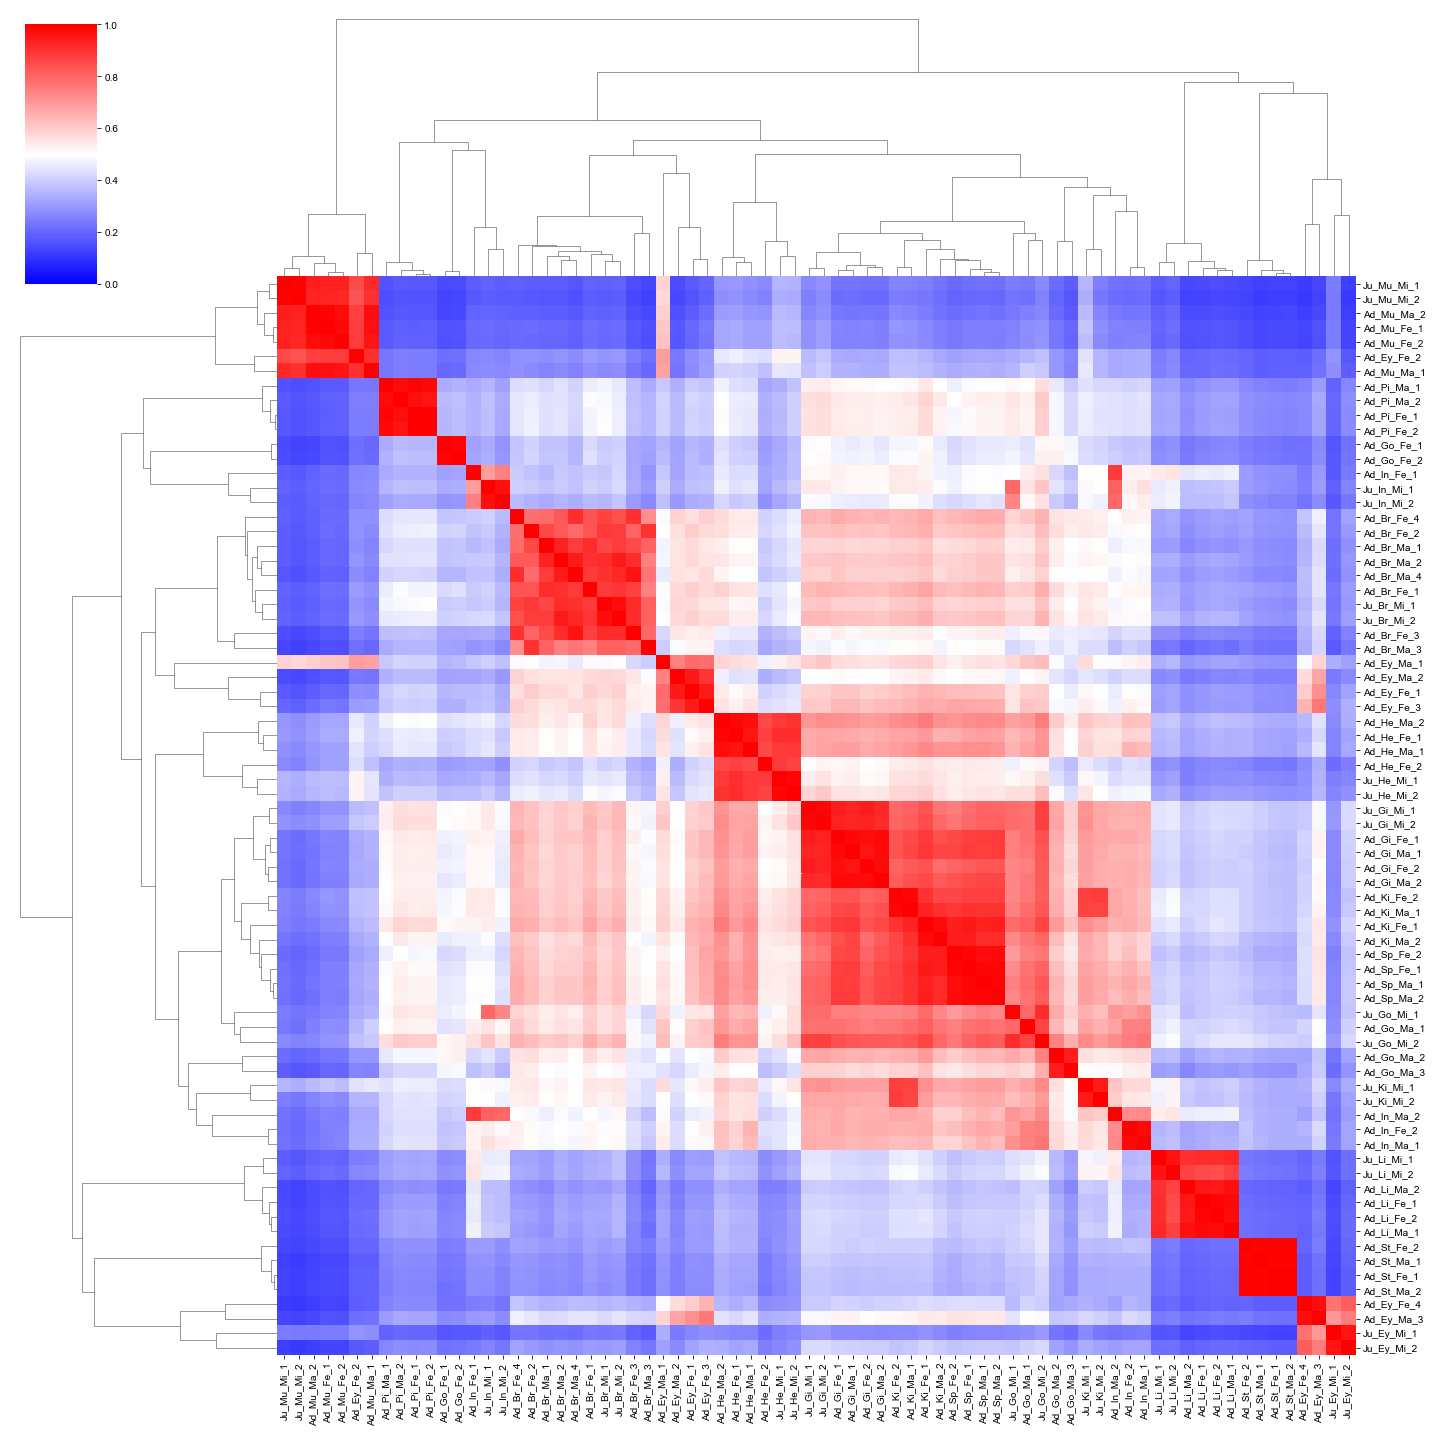

In [37]:
ret = sns.clustermap(corr, cmap="bwr", vmin=0, vmax=1, figsize=(20, 20))
ret.fig.savefig("figures/expression_correlation.clustermap.pdf", dpi=300)

In [74]:
pca = PCA(n_components=2)
ret = pca.fit_transform(mtx.T)
m = pd.DataFrame(ret, index=pd.Index(mtx.columns, name="Sample"), columns=["X", "Y"])
m.head()

,X,Y
Sample,,
Ad_Br_Fe_1,-701.625052,-2059.081310
Ad_Br_Fe_2,-525.679954,-2081.787620
Ad_Br_Fe_3,-466.063800,-2241.853214
Ad_Br_Fe_4,-731.333490,-2045.754725
Ad_Br_Ma_1,-552.335054,-2059.278936


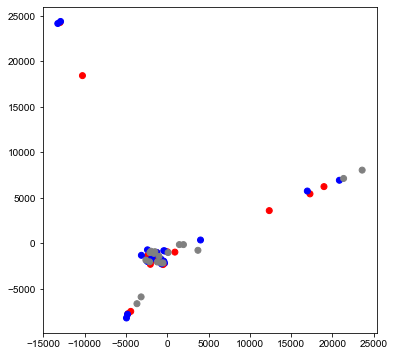

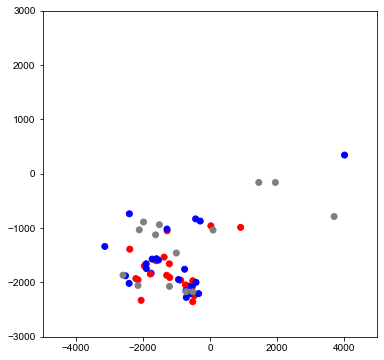

In [75]:
xs = m["X"]
ys = m["Y"]

plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, color=colors)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, color=colors)
plt.xlim(-5000, 5000)
plt.ylim(-3000, 3000)
plt.show()